In [ ]:
import numpy as np

In [119]:
def build_all(k, x, maxi):
    i = 0
    xs = []
    iss = []

    while i<maxi:
        xn = k*x*(1-x)
        x = xn
        i += 1
        xs.append(x)
        iss.append(i)
    return [iss, xs]

def check_balance(xs_s):
    buffer = []
    for r in xs_s:
        if r not in buffer:
            buffer.append(r)
        else:
            break
    return len(buffer)

<IPython.core.display.Javascript object>


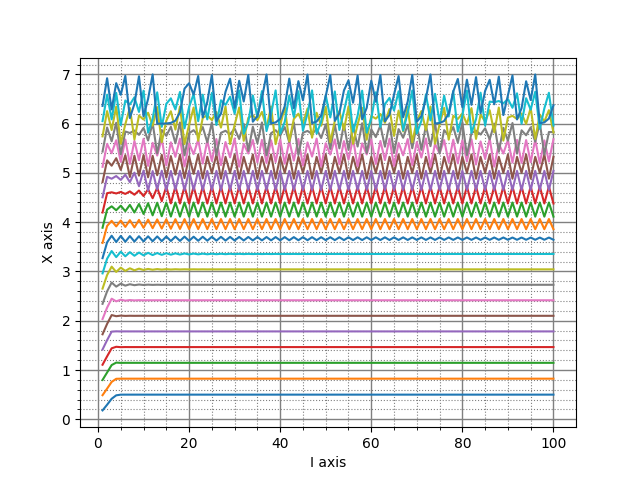

In [120]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('I axis')
ax.set_ylabel('X axis')
ax.minorticks_on()
ax.grid(which='major',
        color = 'grey', 
        linewidth = 1)

ax.grid(which='minor', 
        color = 'grey', 
        linestyle = ':')

j = 0
time.sleep(5)
for i in range(20, 41):
    iss, xs = build_all(i/10, 0.1, 100)
    xs = [xse+j for xse in xs]
    j += 0.3
    ax.plot(iss, xs)
    fig.canvas.draw()
    time.sleep(0.25)


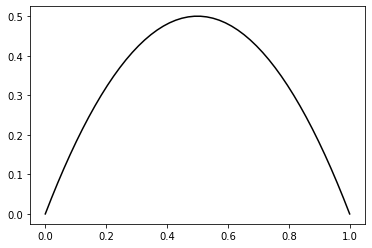

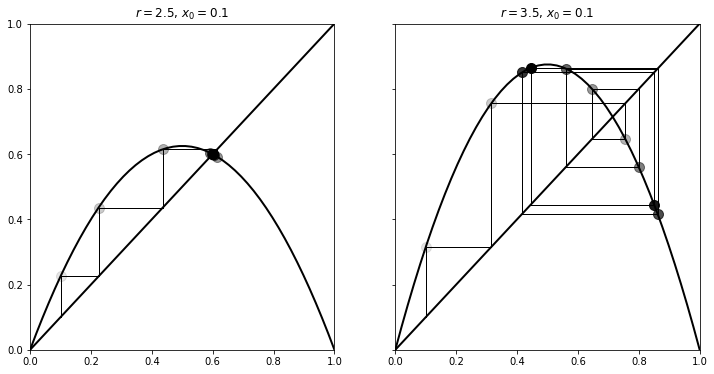

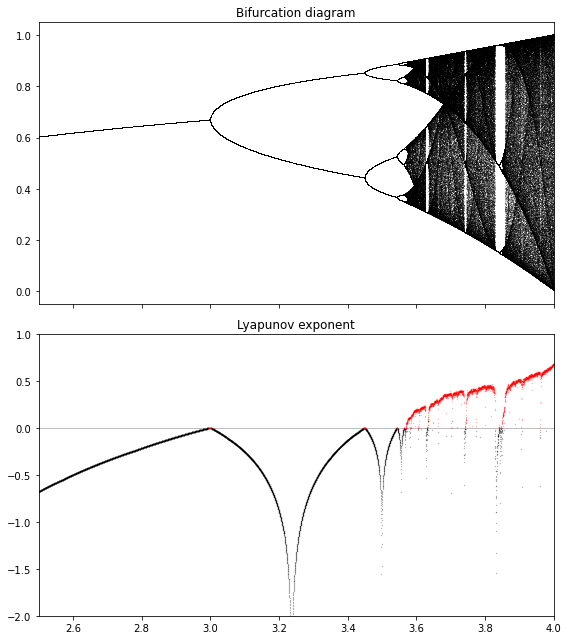

In [122]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def logistic(r, x):
    return r * x * (1 - x)

x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

n = 10000
r = np.linspace(2.5, 4.0, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

